# Build 2D training set using brainweb phantoms

### 1- build a 2D PET object for mMR scanner

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from geometry.BuildGeometry_v4 import BuildGeometry_v4 
from models.deeplib import buildBrainPhantomDataset

In [3]:
# build PET recontruction object 
temPath = r'C:\pythonWorkSpace\tmp003'
PET = BuildGeometry_v4('mmr',0.5) #scanner mmr, with radial crop factor of 50%
PET.loadSystemMatrix(temPath,is3d=False)

loaded in: 0.1491098403930664 sec.


In [7]:
# get some info of Pet object
print('is3d:',PET.is3d)
print('\nscanner info:', PET.scanner.as_dict())
print('\nimage info:',PET.image.as_dict())
print('\nsinogram info:',PET.sinogram.as_dict())


is3d: False

scanner info: {'model_number': 2008, 'circularGantry': 1, 'nBuckets': 224, 'nBlockRings': 8, 'nBlockPerRing': 56, 'nPhysCrystalsPerBlock': 8, 'useVirtualCrystal': 1, 'detectorRadiusCm': 32.8, 'sinogramDOIcm': 0.67, 'LORDOIcm': 0.96, 'rCrystalDimCm': 2.0, 'xCrystalDimCm': 0.41725, 'zCrystalDimCm': 0.40625, 'transaxialFovCm': 60.0, 'maxRingDiff': 60, 'coinciWindowWidthNsec': 5.85938, 'tofResolutionNsec': 5.85938, 'tofOffsetNsec': 0, 'nCrystalsPerBlock': 9, 'nCrystalsPerRing': 504, 'nCrystalRings': 64, 'effDetectorRadiusCm': 33.76, 'isTof': False, 'TofBinWidthNsec': 5.85938, 'planeSepCm': 0.203125}

image info: {'matrixSize': [172, 172, 127], 'voxelSizeCm': [0.208625, 0.208625, 0.203125], 'reconFovRadious': 24.0}

sinogram info: {'radialBinCropfactor': 0.5, 'nRadialBins_orig': 344, 'nRadialBins': 172, 'nMash': 1, 'span': 11, 'nSegments': 11, 'nTofBins': 1, 'nAngularBins': 252, 'numberOfPlanesPerSeg': array([ 27,  49,  71,  93, 115, 127, 115,  93,  71,  49,  27]), 'totalNumbe

### 2- download brainweb phantoms (automatically) and prepare training sets

In [ ]:
# this will take hours (5 phantoms, 5 random rotations each, lesion & sinogram simulation, 3 different recon,...)
# see 'buildBrainPhantomDataset' for default values, e.g. count level, psf, no. lesions, lesion size, no. rotations, rotation range,....
# LD/ld stands for low-definition low-dose, HD/hd stands for high-definition high-dose

phanPath = r'C:\phantoms\brainWeb'
save_training_dir = r'C:\MoDL\trainingDatasets\brainweb\2D'
phanType ='brainweb'
phanNumber = np.arange(0,5,1) # use first 5 brainweb phantoms out of 20

buildBrainPhantomDataset(PET, save_training_dir, phanPath, phanType =phanType,  phanNumber = phanNumber,is3d = False, num_rand_rotations=5)


In [25]:
# check out the strcuture of the produced datasets, e.g. data-0.npy
d = np.load(save_training_dir+ '\\' + 'data-0.npy',allow_pickle=True).item()
d.keys()

dict_keys(['sinoLD', 'imgLD', 'imgLD_psf', 'imgHD', 'AN', 'RS', 'imgGT', 'mrImg', 'counts', 'psf_hd', 'psf_ld', 'niter_hd', 'nsubs_hd', 'niter_ld', 'nsubs_ld', 'num_lesions', 'lesion_size_mm', 'hot_cold_ratio', 'rot_angle_degrees', 'counts_hd', 'count_ld_window_3d', 'count_ld_window_2d', 'pet_lesion', 't1_lesion', 'phanType', 'phanPath'])

(<matplotlib.image.AxesImage at 0x194593eca08>, Text(0.5, 1.0, 'imgLD_psf'))

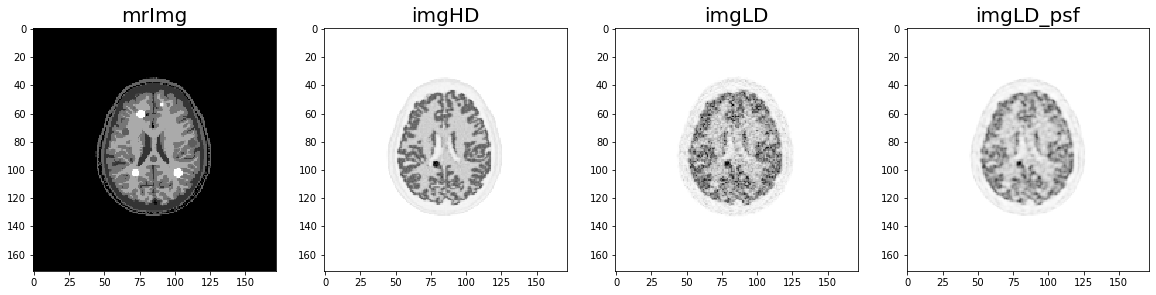

In [26]:
fig, ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(d['mrImg'],cmap='gist_gray'),ax[0].set_title('mrImg',fontsize=20)
ax[1].imshow(d['imgHD'],cmap='gist_gray_r'),ax[1].set_title('imgHD',fontsize=20)
ax[2].imshow(d['imgLD'],cmap='gist_gray_r'),ax[2].set_title('imgLD',fontsize=20)
ax[3].imshow(d['imgLD_psf'],cmap='gist_gray_r'),ax[3].set_title('imgLD_psf',fontsize=20)

(<matplotlib.image.AxesImage at 0x194594f7c08>,
 Text(0.5, 1.0, 'Atten. factors * Norm. Factors (AN)'))

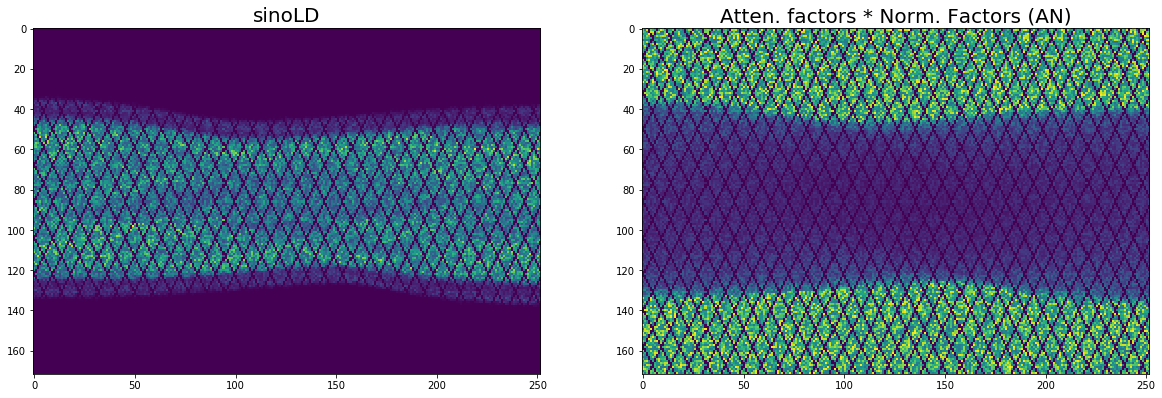

In [27]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(d['sinoLD']),ax[0].set_title('sinoLD',fontsize=20)
ax[1].imshow(d['AN']),ax[1].set_title('Atten. factors * Norm. Factors (AN)',fontsize=20)
